<a href="https://www.kaggle.com/code/brianlaurenszzz/linear-regresion-decison-tree-random-forest?scriptVersionId=102487642" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cars-purchase-decision-dataset/car_data.csv


# Load Data

In [2]:
df = pd.read_csv('/kaggle/input/cars-purchase-decision-dataset/car_data.csv')
df.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


Columns:
User ID
Gender
Age
Annual Salary
Purchase Decision (No = 0; Yes = 1)

In [3]:
# Check total data
print(f"Column {df.shape[1]}, and Rows {df.shape[0]}")

Column 5, and Rows 1000


In [4]:
# Show basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [6]:
df2 = df.copy()
df2[df['Purchased'] == 1]

df2.loc[df['Purchased'] == 1, 'Purchased'] = 'Yes'
df2.loc[df['Purchased'] == 0, 'Purchased'] = 'No'

df2.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,No
1,681,Male,40,43500,No
2,353,Male,49,74000,No
3,895,Male,40,107500,Yes
4,661,Male,25,79000,No


In [7]:
# distribution of gender + Purchased (in percentage)
total_data = len(df2)
df2.groupby(['Gender', 'Purchased']).size()/ total_data * 100

Gender  Purchased
Female  No           29.7
        Yes          21.9
Male    No           30.1
        Yes          18.3
dtype: float64

# Data Vizualization

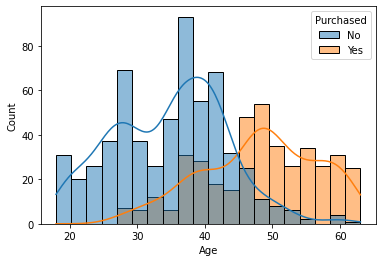

In [8]:
sns.histplot(data=df2, x='Age', hue='Purchased', kde=True, bins=20);

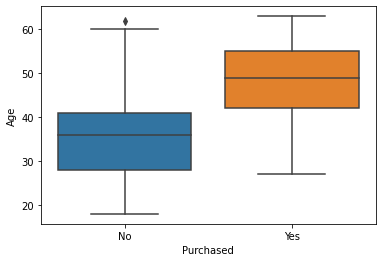

In [9]:
sns.boxplot(data=df2, x='Purchased', y='Age');

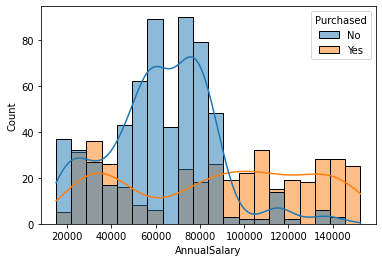

In [10]:
sns.histplot(data=df2, x='AnnualSalary', hue='Purchased', kde=True, bins=20);

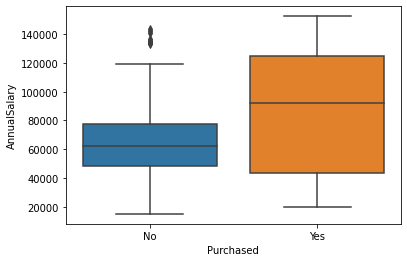

In [11]:
sns.boxplot(data=df2, x='Purchased', y='AnnualSalary');

<AxesSubplot:xlabel='Gender', ylabel='count'>

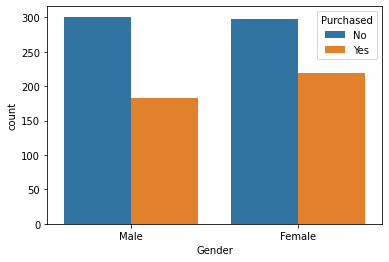

In [12]:
sns.countplot(data=df2, x='Gender', hue='Purchased')

# Pre-processing

In [13]:
df.loc[df['Gender'] == 'Male', 'Gender'] = 0
df.loc[df['Gender'] == 'Female', 'Gender'] = 1
df = df.drop(columns=['User ID'])

In [14]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,0,35,20000,0
1,0,40,43500,0
2,0,49,74000,0
3,0,40,107500,1
4,0,25,79000,0


# Model

In [15]:
#For data split
from sklearn.model_selection import train_test_split

#Model RandomForest, LogicticRegression, Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#For model performance evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [16]:
#Splitting Data

train, test = train_test_split(df, test_size=0.2, random_state=17)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 800
No. of testing examples: 200


In [17]:
#X and Y for Train
x_train=train.drop('Purchased',axis=1)
y_train=train[['Purchased']]

#X and Y for Test
x_test=test.drop('Purchased',axis=1)
y_test=test[['Purchased']]

#Shapes x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 3), (800, 1), (200, 3), (200, 1))

In [18]:
x_train.head(2)

,Gender,Age,AnnualSalary
421,1,41,57500
165,0,58,61500


In [19]:
y_train.head(2)

,Purchased
421,0
165,1


# Linear Regression

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
lr_score = lr.score(x_test, y_test)
lr_score

0.44823875929716706

In [22]:
y_pred = lr.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[0.54661034 0.148468   0.87701049 0.86698457 0.35419052]
[1 1 1 1 0]


In [23]:
lr_mse = mean_squared_error(y_test.values, y_pred)
lr_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
lr_mae = mean_absolute_error(y_test.values, y_pred)
lr_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(lr_mse))
print('Score Root Mean Squared Error = {}'.format(lr_rmse))
print('Score Mean Absolute Error     = {}'.format(lr_mae))
print('Score R2                      = {}'.format(lr_r))

Score Mean Squared Error      = 0.1246842463678227
Score Root Mean Squared Error = 0.35310656517236083
Score Mean Absolute Error     = 0.2880422492526526
Score R2                      = 0.44823875929716706


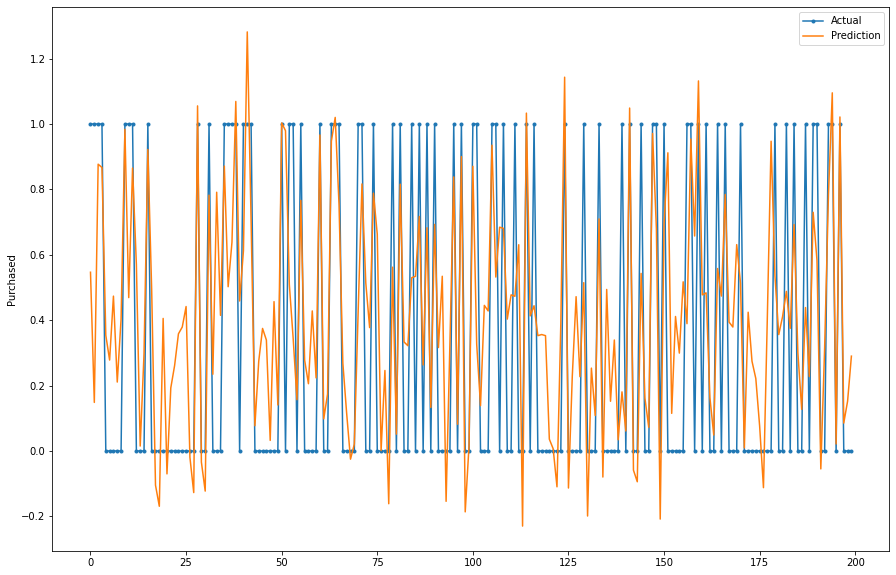

In [24]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Purchased')
# plt.title('University ranking prediction with Linear Regression')
plt.legend()
plt.show()

In [25]:
prediction = pd.DataFrame()
prediction['Actual'] = y_test.values.flatten()
prediction['Linear Regression'] = y_pred.flatten()
prediction['Linear Regression'] = prediction['Linear Regression'].round(0)
prediction.head(20)

,Actual,Linear Regression
0,1,1.0
1,1,0.0
2,1,1.0
3,1,1.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,1,1.0


# Decision Tree

In [26]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [27]:
dt_score = dt.score(x_test, y_test)
dt_score

0.4468414647638014

In [28]:
y_pred = dt.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[1. 0. 1. 1. 0.]
[1 1 1 1 0]


In [29]:
dt_mse = mean_squared_error(y_test.values, y_pred)
dt_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
dt_mae = mean_absolute_error(y_test.values, y_pred)
dt_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(dt_mse))
print('Score Root Mean Squared Error = {}'.format(dt_rmse))
print('Score Mean Absolute Error     = {}'.format(dt_mae))
print('Score R2                      = {}'.format(dt_r))

Score Mean Squared Error      = 0.125
Score Root Mean Squared Error = 0.3535533905932738
Score Mean Absolute Error     = 0.125
Score R2                      = 0.4468414647638014


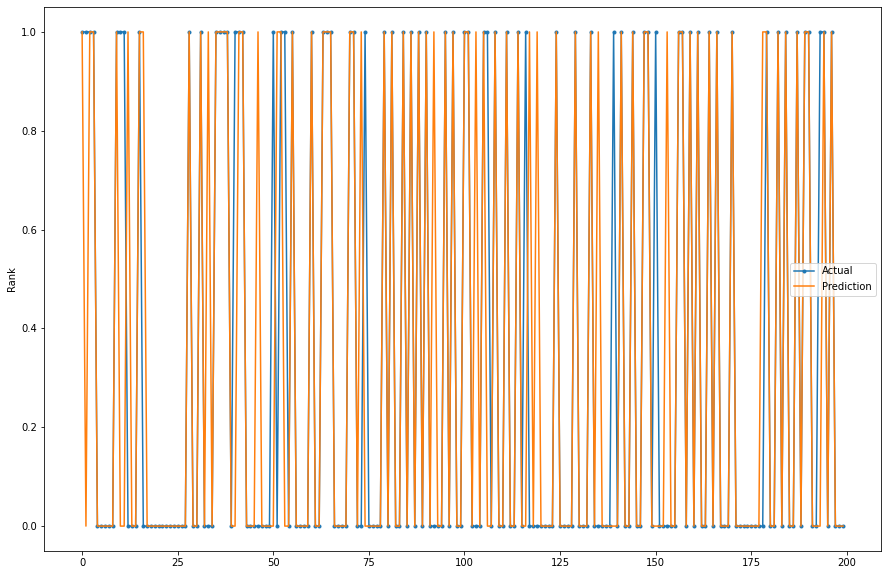

In [30]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
# plt.title('University ranking prediction with DecisionTree')
plt.legend()
plt.show()

In [31]:
prediction['DecisionTree'] = y_pred.flatten()
prediction['DecisionTree'] = prediction['DecisionTree'].round(0)
prediction.head(20)

,Actual,Linear Regression,DecisionTree
0,1,1.0,1.0
1,1,0.0,0.0
2,1,1.0,1.0
3,1,1.0,1.0
4,0,0.0,0.0
5,0,0.0,0.0
6,0,0.0,0.0
7,0,0.0,0.0
8,0,0.0,0.0
9,1,1.0,1.0


# Random Forest

In [32]:
rf = RandomForestRegressor(max_depth=10, random_state=0)

rf.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10, random_state=0)

In [33]:
rf_score = rf.score(x_test, y_test)
rf_score

0.7555781211040136

In [34]:
y_pred = rf.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[1.   0.46 1.   0.89 0.  ]
[1 1 1 1 0]


In [35]:
rf_mse = mean_squared_error(y_test.values, y_pred)
rf_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
rf_mae = mean_absolute_error(y_test.values, y_pred)
rf_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(rf_mse))
print('Score Root Mean Squared Error = {}'.format(rf_rmse))
print('Score Mean Absolute Error     = {}'.format(rf_mae))
print('Score R2                      = {}'.format(rf_r))

Score Mean Squared Error      = 0.05523323408352055
Score Root Mean Squared Error = 0.2350175186736524
Score Mean Absolute Error     = 0.1129757122366239
Score R2                      = 0.7555781211040136


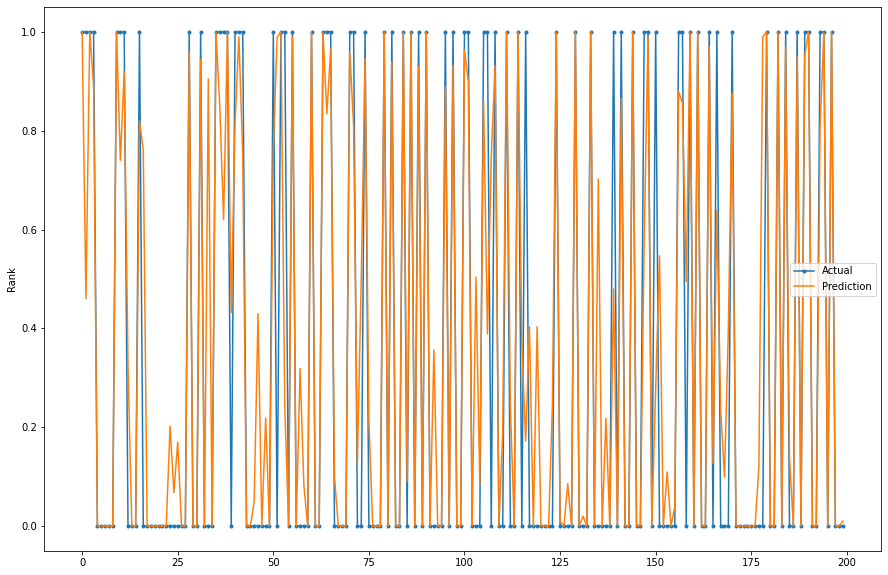

In [36]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.legend()
plt.show()

In [37]:
prediction['RandomForest'] = y_pred.flatten()
prediction['RandomForest'] = prediction['RandomForest'].round(0)
prediction.head(20)

,Actual,Linear Regression,DecisionTree,RandomForest
0,1,1.0,1.0,1.0
1,1,0.0,0.0,0.0
2,1,1.0,1.0,1.0
3,1,1.0,1.0,1.0
4,0,0.0,0.0,0.0
5,0,0.0,0.0,0.0
6,0,0.0,0.0,0.0
7,0,0.0,0.0,0.0
8,0,0.0,0.0,0.0
9,1,1.0,1.0,1.0


# Comparison

In [38]:
print('Score MSE LinearRegression  = {}'.format(lr_mse))
print('Score MSE DecisionTree      = {}'.format(dt_mse))
print('Score MSE RandomForest      = {}'.format(rf_mse))

print('='*55)
print('Score RMSE LinearRegression = {}'.format(lr_rmse))
print('Score RMSE DecisionTree     = {}'.format(dt_rmse))
print('Score RMSE RandomForest     = {}'.format(rf_rmse))

print('='*55)
print('Score MAE LinearRegression  = {}'.format(lr_mae))
print('Score MAE DecisionTree      = {}'.format(dt_mae))
print('Score MAE RandomForest      = {}'.format(rf_mae))

print('='*55)
print('Score R2 Linear Regression  = {}'.format(lr_r))
print('Score R2 DecisionTree       = {}'.format(dt_r))
print('Score R2 RandomForest       = {}'.format(rf_r))

Score MSE LinearRegression  = 0.1246842463678227
Score MSE DecisionTree      = 0.125
Score MSE RandomForest      = 0.05523323408352055
Score RMSE LinearRegression = 0.35310656517236083
Score RMSE DecisionTree     = 0.3535533905932738
Score RMSE RandomForest     = 0.2350175186736524
Score MAE LinearRegression  = 0.2880422492526526
Score MAE DecisionTree      = 0.125
Score MAE RandomForest      = 0.1129757122366239
Score R2 Linear Regression  = 0.44823875929716706
Score R2 DecisionTree       = 0.4468414647638014
Score R2 RandomForest       = 0.7555781211040136
